In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min


In [31]:
# Step 1: Load the dataset
file_path = 'tugas5_genap.csv'  # Replace with your file path
dataset = pd.read_csv(file_path)

In [32]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        172000 non-null  int64  
 1   Age                       172000 non-null  int64  
 2   Gender                    172000 non-null  object 
 3   Hypertension              172000 non-null  int64  
 4   Heart Disease             172000 non-null  int64  
 5   Ever Married              172000 non-null  int64  
 6   Work Type                 172000 non-null  object 
 7   Residence Type            172000 non-null  object 
 8   Average Glucose Level     172000 non-null  float64
 9   BMI                       172000 non-null  float64
 10  Smoking Status            172000 non-null  object 
 11  Physical Activity         172000 non-null  object 
 12  Dietary Habits            172000 non-null  object 
 13  Alcohol Consumption       172000 non-null  i

In [33]:
# Step 2: Check for missing values
print(dataset.isnull().sum())

ID                          0
Age                         0
Gender                      0
Hypertension                0
Heart Disease               0
Ever Married                0
Work Type                   0
Residence Type              0
Average Glucose Level       0
BMI                         0
Smoking Status              0
Physical Activity           0
Dietary Habits              0
Alcohol Consumption         0
Chronic Stress              0
Sleep Hours                 0
Family History of Stroke    0
Education Level             0
Income Level                0
Stroke Risk Score           0
Region                      0
Stroke Occurrence           0
dtype: int64


In [34]:
# Step 3: Encoding categorical columns
categorical_columns = dataset.select_dtypes(include=['object']).columns
dataset_encoded = pd.get_dummies(dataset, columns=categorical_columns, drop_first=True)

In [35]:
# Step 4: Normalize numerical columns
numerical_columns = dataset_encoded.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
dataset_encoded[numerical_columns] = scaler.fit_transform(dataset_encoded[numerical_columns])

In [36]:
dataset_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172000 entries, 0 to 171999
Data columns (total 36 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   ID                             172000 non-null  float64
 1   Age                            172000 non-null  float64
 2   Hypertension                   172000 non-null  float64
 3   Heart Disease                  172000 non-null  float64
 4   Ever Married                   172000 non-null  float64
 5   Average Glucose Level          172000 non-null  float64
 6   BMI                            172000 non-null  float64
 7   Alcohol Consumption            172000 non-null  float64
 8   Chronic Stress                 172000 non-null  float64
 9   Sleep Hours                    172000 non-null  float64
 10  Family History of Stroke       172000 non-null  float64
 11  Stroke Risk Score              172000 non-null  float64
 12  Stroke Occurrence             

In [37]:
# Step 5: KMeans Clustering - Elbow Method, Silhouette Score, and Gap Statistic
kmeans_inertia = []
silhouette_scores = []
gap_scores = []
K_range = range(2, 11)

# Sample a smaller subset of the dataset for efficiency
dataset_encoded = dataset_encoded[['Age', 'BMI', 'Hypertension', 'Heart Disease', 'Stroke Risk Score']]

# Calculate inertia (for Elbow method), silhouette score, and gap statistic
for k in K_range:
    # KMeans clustering
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(dataset_encoded)
    
    # Elbow method (inertia)
    kmeans_inertia.append(kmeans.inertia_)
    
    # Silhouette Score
    silhouette_scores.append(silhouette_score(dataset_encoded, kmeans.labels_))
    
    # Gap Statistic calculation
    reference_data = np.random.rand(dataset_encoded.shape[0], dataset_encoded.shape[1])
    reference_kmeans = KMeans(n_clusters=k, random_state=42)
    reference_kmeans.fit(reference_data)
    
    # Calculate the gap statistic (difference between actual and reference inertia)
    gap_score = np.log(np.sum(pairwise_distances_argmin_min(dataset_encoded, kmeans.cluster_centers_)[1])) - np.log(np.sum(pairwise_distances_argmin_min(reference_data, reference_kmeans.cluster_centers_)[1]))
    gap_scores.append(gap_score)

# Plot Elbow method, Silhouette Score, and Gap Statistic
plt.figure(figsize=(18, 6))

# Elbow method plot
plt.subplot(1, 3, 1)
plt.plot(K_range, kmeans_inertia, marker='o')
plt.title('Elbow Method for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')

# Silhouette Score plot
plt.subplot(1, 3, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Score for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')

# Gap Statistic plot
plt.subplot(1, 3, 3)
plt.plot(K_range, gap_scores, marker='o', color='green')
plt.title('Gap Statistic for KMeans Clustering')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Gap Statistic')

plt.tight_layout()
plt.show()

KeyboardInterrupt: 

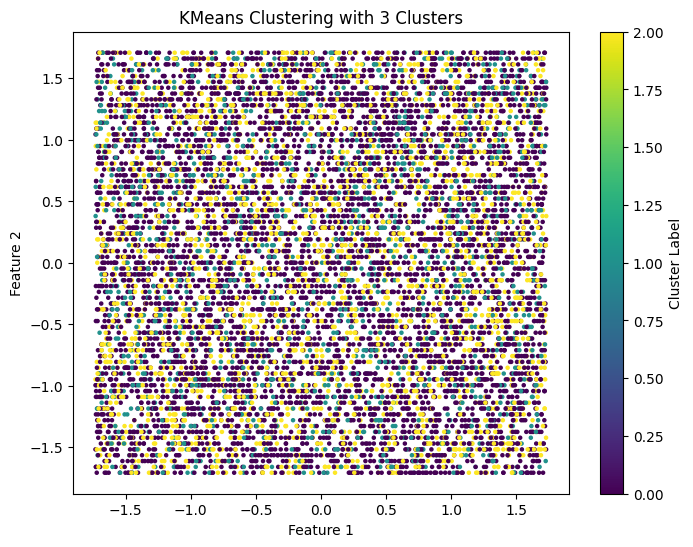

In [ ]:
# Step 6: Apply KMeans Clustering with the Optimal Number of Clusters
# Based on the Elbow method, Silhouette Score, and Gap Statistic, let's assume the optimal number of clusters is 4
optimal_k = 3  # Adjust this based on the analysis from previous steps

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans_labels = kmeans.fit_predict(dataset_encoded)

# Step 7: Visualize the Clustering Results using the first two features
plt.figure(figsize=(8, 6))
plt.scatter(dataset_encoded.iloc[:, 0], dataset_encoded.iloc[:, 1], c=kmeans_labels, cmap='viridis', s=5)
plt.title(f'KMeans Clustering with {optimal_k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()

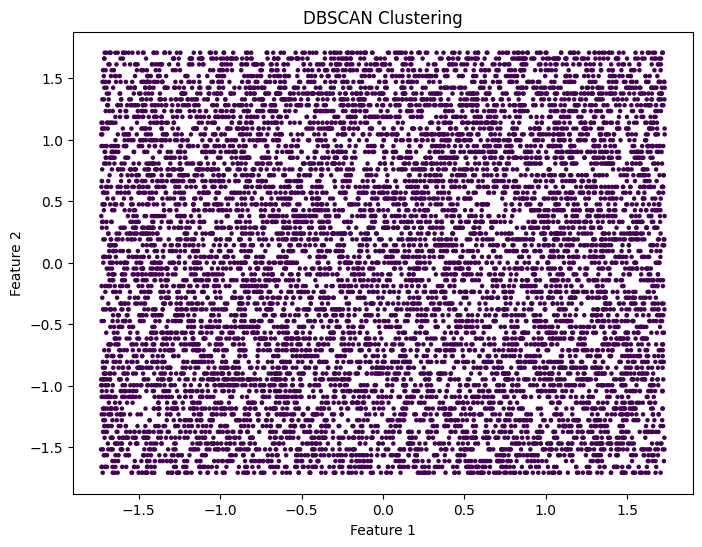

In [ ]:
# Step 6: Apply DBSCAN Clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(dataset_encoded)

# Plot DBSCAN results
plt.figure(figsize=(8, 6))
plt.scatter(dataset_encoded.iloc[:, 0], dataset_encoded.iloc[:, 1], c=dbscan_labels, cmap='viridis', s=5)
plt.title('DBSCAN Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()